In [2]:
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
def performance_measure(y_actual, y_predicted):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(y_actual)):
        if y_actual[i] != 0 and y_predicted[i] != 0:
            TP += 1
        if y_actual[i] != 0 and y_predicted[i] == 0:
            FN += 1
        if y_actual[i] == 0 and y_predicted[i] == 0:
            TN += 1
        if y_actual[i] == 0 and y_predicted[i] != 0:
            FP += 1
    results = dict({"True Positive":TP, "False Positive":FP, "True Negative":TN, "False Negative":FN})
    return results

In [4]:
results = performance_measure([0,1,0,1,0,1,0,1,0,0,0,1],[1,0,1,0,0,0,1,1,0,1,0,1])

In [5]:
def confusion_matrix(conf_matrx_values):
    confusion_matrix = [[0 for i in range(2)] for j in range(2)]
    confusion_matrix[0][0] = conf_matrx_values["True Positive"]
    confusion_matrix[0][1] = conf_matrx_values["False Positive"]
    confusion_matrix[1][0] = conf_matrx_values["False Negative"]
    confusion_matrix[1][1] = conf_matrx_values["True Negative"]
    confusion_matrix = np.asarray(confusion_matrix)
    grp_names = ["True Pos", "False Pos", "False Neg", "True Neg"]
    grp_perc = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}" for v1,v2 in zip(grp_names, grp_perc)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix/np.sum(confusion_matrix),annot=labels, fmt='', cmap='Reds')


In [6]:
def cal_values(results, y_test, model_output):
    TP = results["True Positive"]
    FP = results["False Positive"]    
    TN = results["True Negative"]
    FN = results["False Negative"]

    TPR = TP / (TP + FN)
    print("The TPR is : %.4f" %TPR)

    FPR = FP/(FP+TN)
    print("The FPR is : %.4f" %FPR)

    IDR = TPR * (1-FPR)
    print("The IDR is : %.4f" %IDR)

    AUC = (roc_auc_score(y_test, model_output))
    print("The AUC value is : %.4f" %AUC)

    return (TPR,FPR,IDR,AUC)

In [7]:
import pandas as pd

In [9]:
df_train = pd.read_csv("./dataset/train.csv", header=None)
df_test = pd.read_csv("./dataset/test.csv", header=None)

In [10]:
df_train = df_train.values
df_test = df_test.values

In [11]:
x_train = df_train[:,:-1]
y_train = df_train[:,-1]

In [12]:
x_test = df_test[:,:-1]
y_test = df_test[:,-1:]

# DECISION TREE

The TPR is : 0.9467
The FPR is : 0.0006
The IDR is : 0.9462
The AUC value is : 0.9731


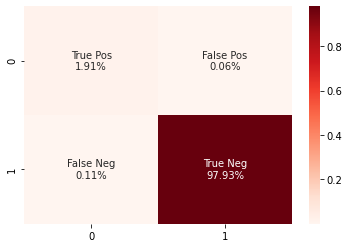

In [111]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_model_output = dtc.predict(x_test)

dtc_results = performance_measure(y_actual=y_test, y_predicted=model_output)
confusion_matrix(dtc_results)

TPR,FPR, IDR, AUC = cal_values(dtc_results,y_test=y_test,model_output=dtc_model_output)


## HYPERPARAMTER TUNING

In [133]:
dtc_parameters = {
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
            }

In [134]:
DTC_grid = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, verbose=True, n_jobs=-1)

In [135]:
DTC_grid_model = DTC_grid.fit(x_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    7.0s finished


The TPR is : 0.6509
The FPR is : 0.0000
The IDR is : 0.6509
The AUC value is : 0.8254


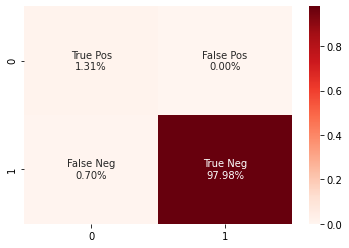

In [140]:
dtc_best = DTC_grid_model.best_estimator_
dtc_best.fit(x_train, y_train)
dtc_best_model_output = dtc_best.predict(x_test)

dtc_best_results = performance_measure(y_actual=y_test, y_predicted=dtc_best_model_output)
confusion_matrix(results)

TPR,FPR, IDR, AUC = cal_values(dtc_best_model_results,y_test=y_test,model_output=dtc_best_model_output)

# NAIVE BAYES

The TPR is : 0.6509
The FPR is : 0.0000
The IDR is : 0.6509
The AUC value is : 0.8254


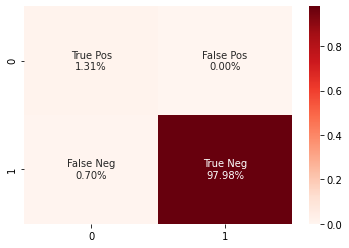

In [112]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()
naive_bayes.fit(x_train, y_train)
model_output = naive_bayes.predict(x_test)

results = performance_measure(y_actual=y_test, y_predicted=model_output)
confusion_matrix(results)

TPR,FPR, IDR, AUC = cal_values(results,y_test=y_test,model_output=model_output)

# RANDOM FOREST

The TPR is : 0.9704
The FPR is : 0.0002
The IDR is : 0.9702
The AUC value is : 0.9851


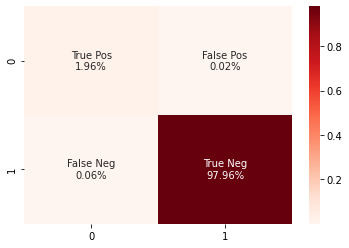

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_model_output = rfc.predict(x_test)

rfc_results = performance_measure(y_actual=y_test, y_predicted=rfc_model_output)
confusion_matrix(rfc_results)

TPR,FPR, IDR, AUC = cal_values(rfc_results,y_test=y_test,model_output=rfc_model_output)

## HYPERPARAMETER TUNING

In [118]:
rfc_parameters = {'n_estimators': (10, 30, 50, 70, 90, 100),
              'criterion': ('gini', 'entropy'),
              'max_depth': (3,5,7,9,10),
              'max_features': ('auto','sqrt'),
              'min_samples_split': (2,4,6),
             }

In [119]:
RF_grid = GridSearchCV(rfc, param_grid=rfc_parameters, cv=3, verbose=True, n_jobs=-1)

In [120]:
RF_grid_model = RF_grid.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.1min finished


The TPR is : 0.9645
The FPR is : 0.0002
The IDR is : 0.9643
The AUC value is : 0.9821


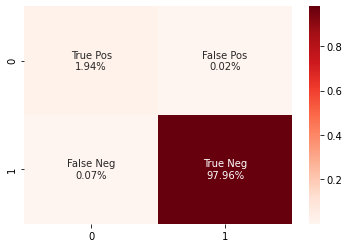

In [138]:
rfc_best = RF_grid_model.best_estimator_
rfc_best.fit(x_train, y_train)
rfc_best_model_output = rfc.predict(x_test)

rfc_best_results = performance_measure(y_actual=y_test, y_predicted=rfc_best_model_output)
confusion_matrix(rfc_best_results)

TPR,FPR, IDR, AUC = cal_values(rfc_best_results,y_test=y_test,model_output=rfc_best_model_output)

/home/axebell/anaconda3/envs/maljpeg/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[12:52:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The TPR is : 0.9586
The FPR is : 0.0001
The IDR is : 0.9585
The AUC value is : 0.9792


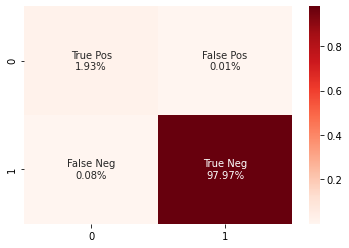

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier
xgm = XGBClassifier()
xgm.fit(x_train, y_train)
xgm_model_output = xgm.predict(x_test)

xgm_results = performance_measure(y_actual=y_test, y_predicted=xgm_model_output)
confusion_matrix(xgm_results)

TPR,FPR, IDR, AUC = cal_values(xgm_results,y_test=y_test,model_output=xgm_model_output)

## HYPERPARAMETER TUNING

In [23]:
xgb.Dmatrix(x_train, label=y_train)

AttributeError: module 'xgboost' has no attribute 'Dmatrix'